# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Load

In [2]:
data=pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Basic Check

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.shape

(4238, 16)

In [8]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Exploratory Data Analysis(EDA)

### Univariate analysis


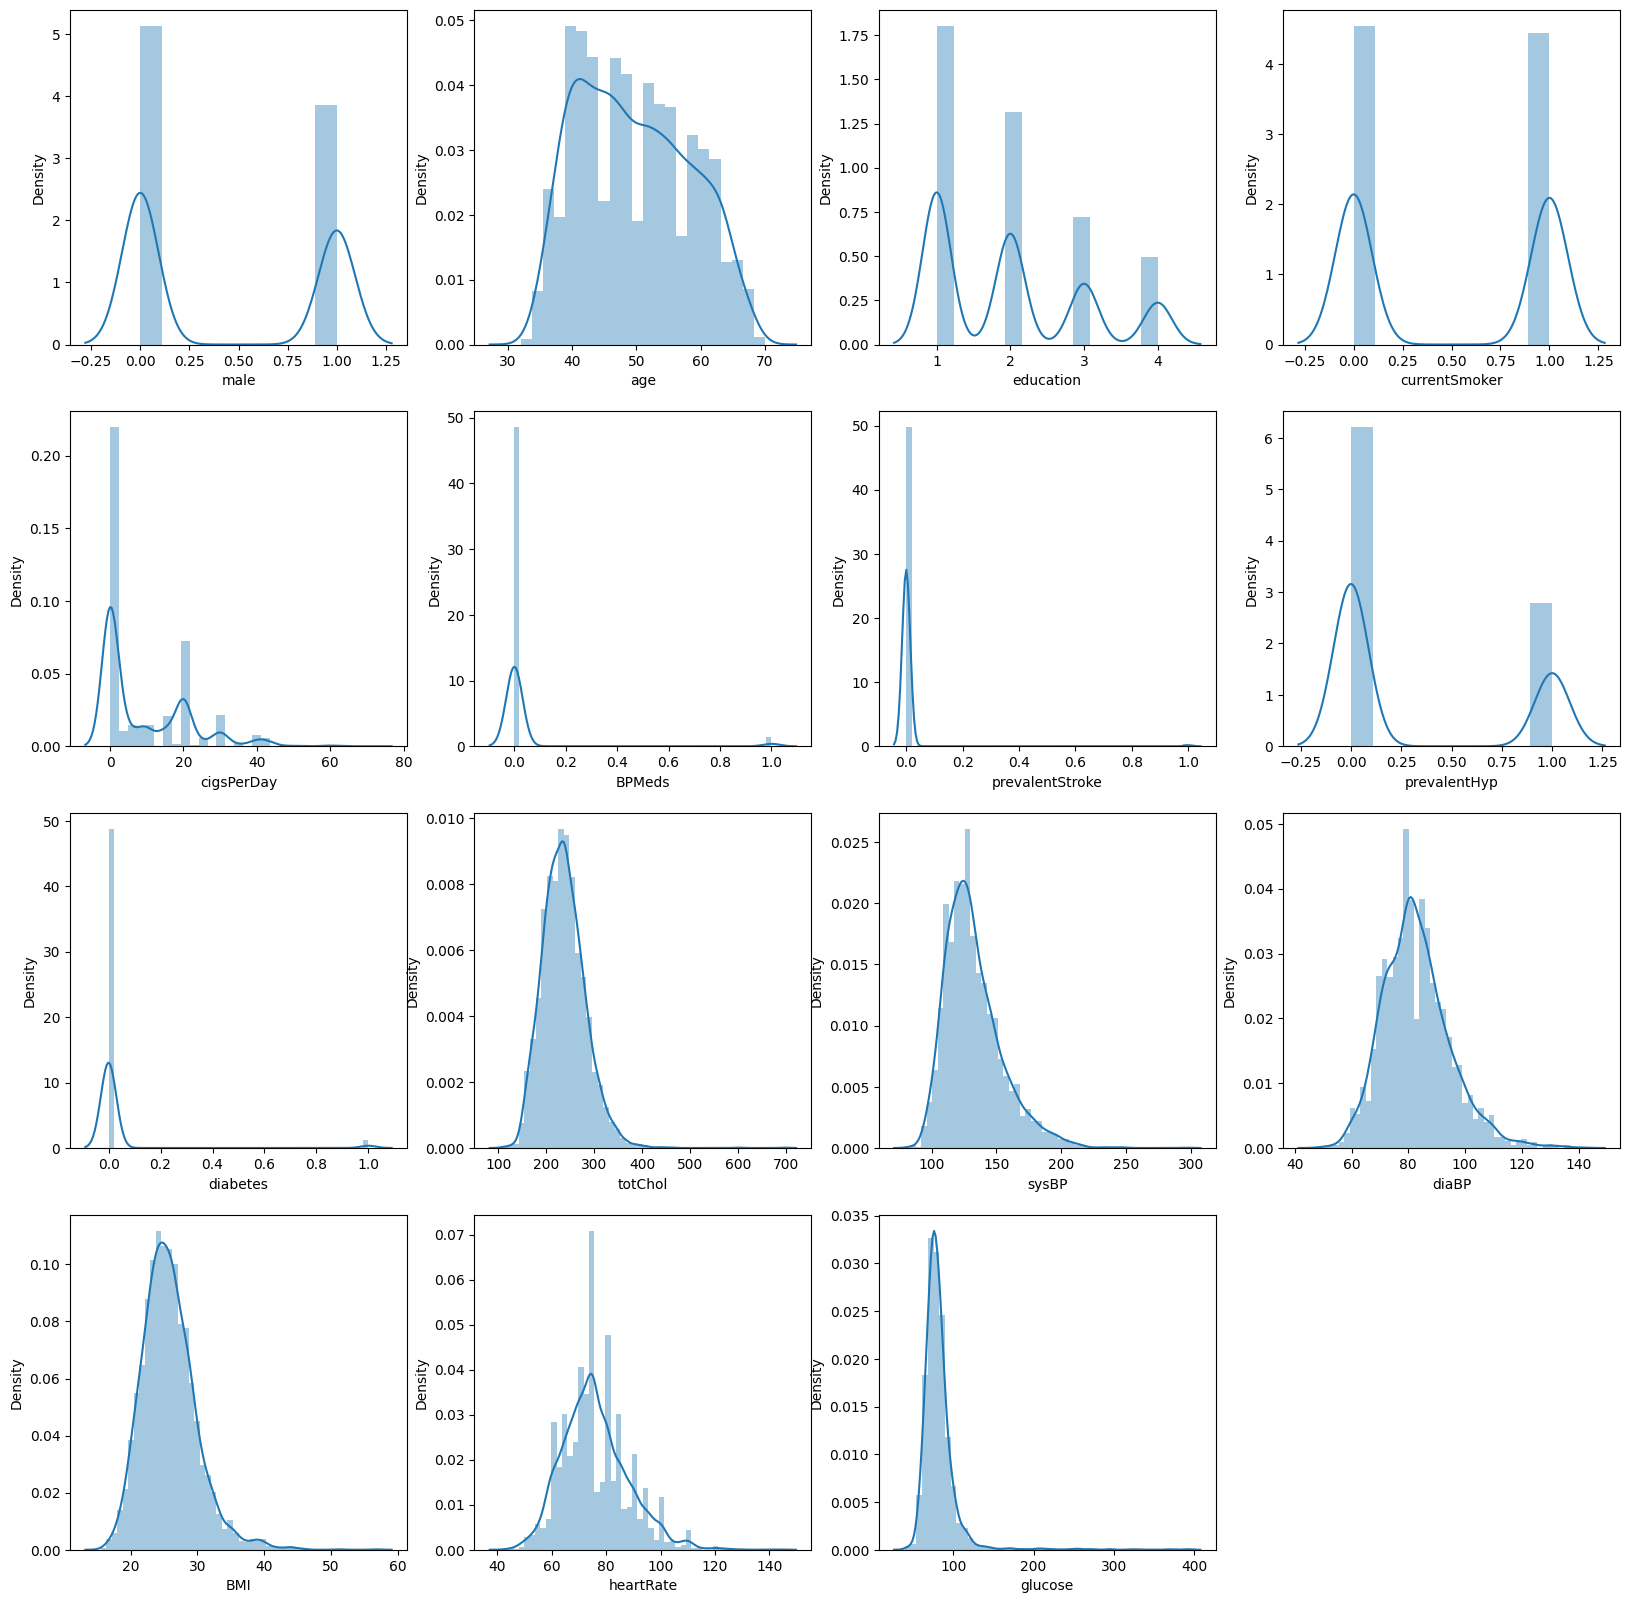

In [10]:
plt.figure(figsize=(20,20))
num=1
for col in data.drop('TenYearCHD',axis=1):
    if num<=16:
        plt.subplot(4,4,num)
        sns.distplot(x=data[col])
        plt.xlabel(col)
    num+=1 

<Axes: xlabel='TenYearCHD', ylabel='count'>

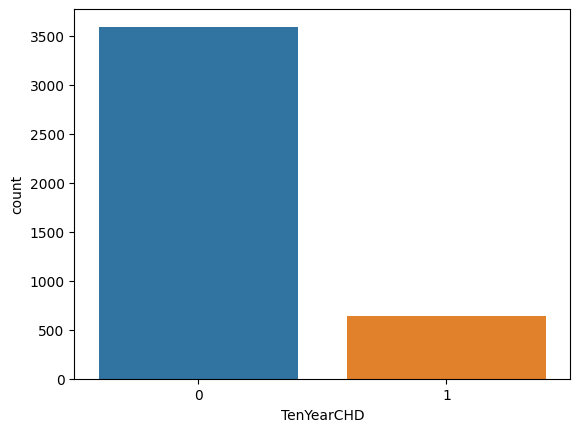

In [11]:
sns.countplot(data=data,x='TenYearCHD')

### Bivariate Analysis

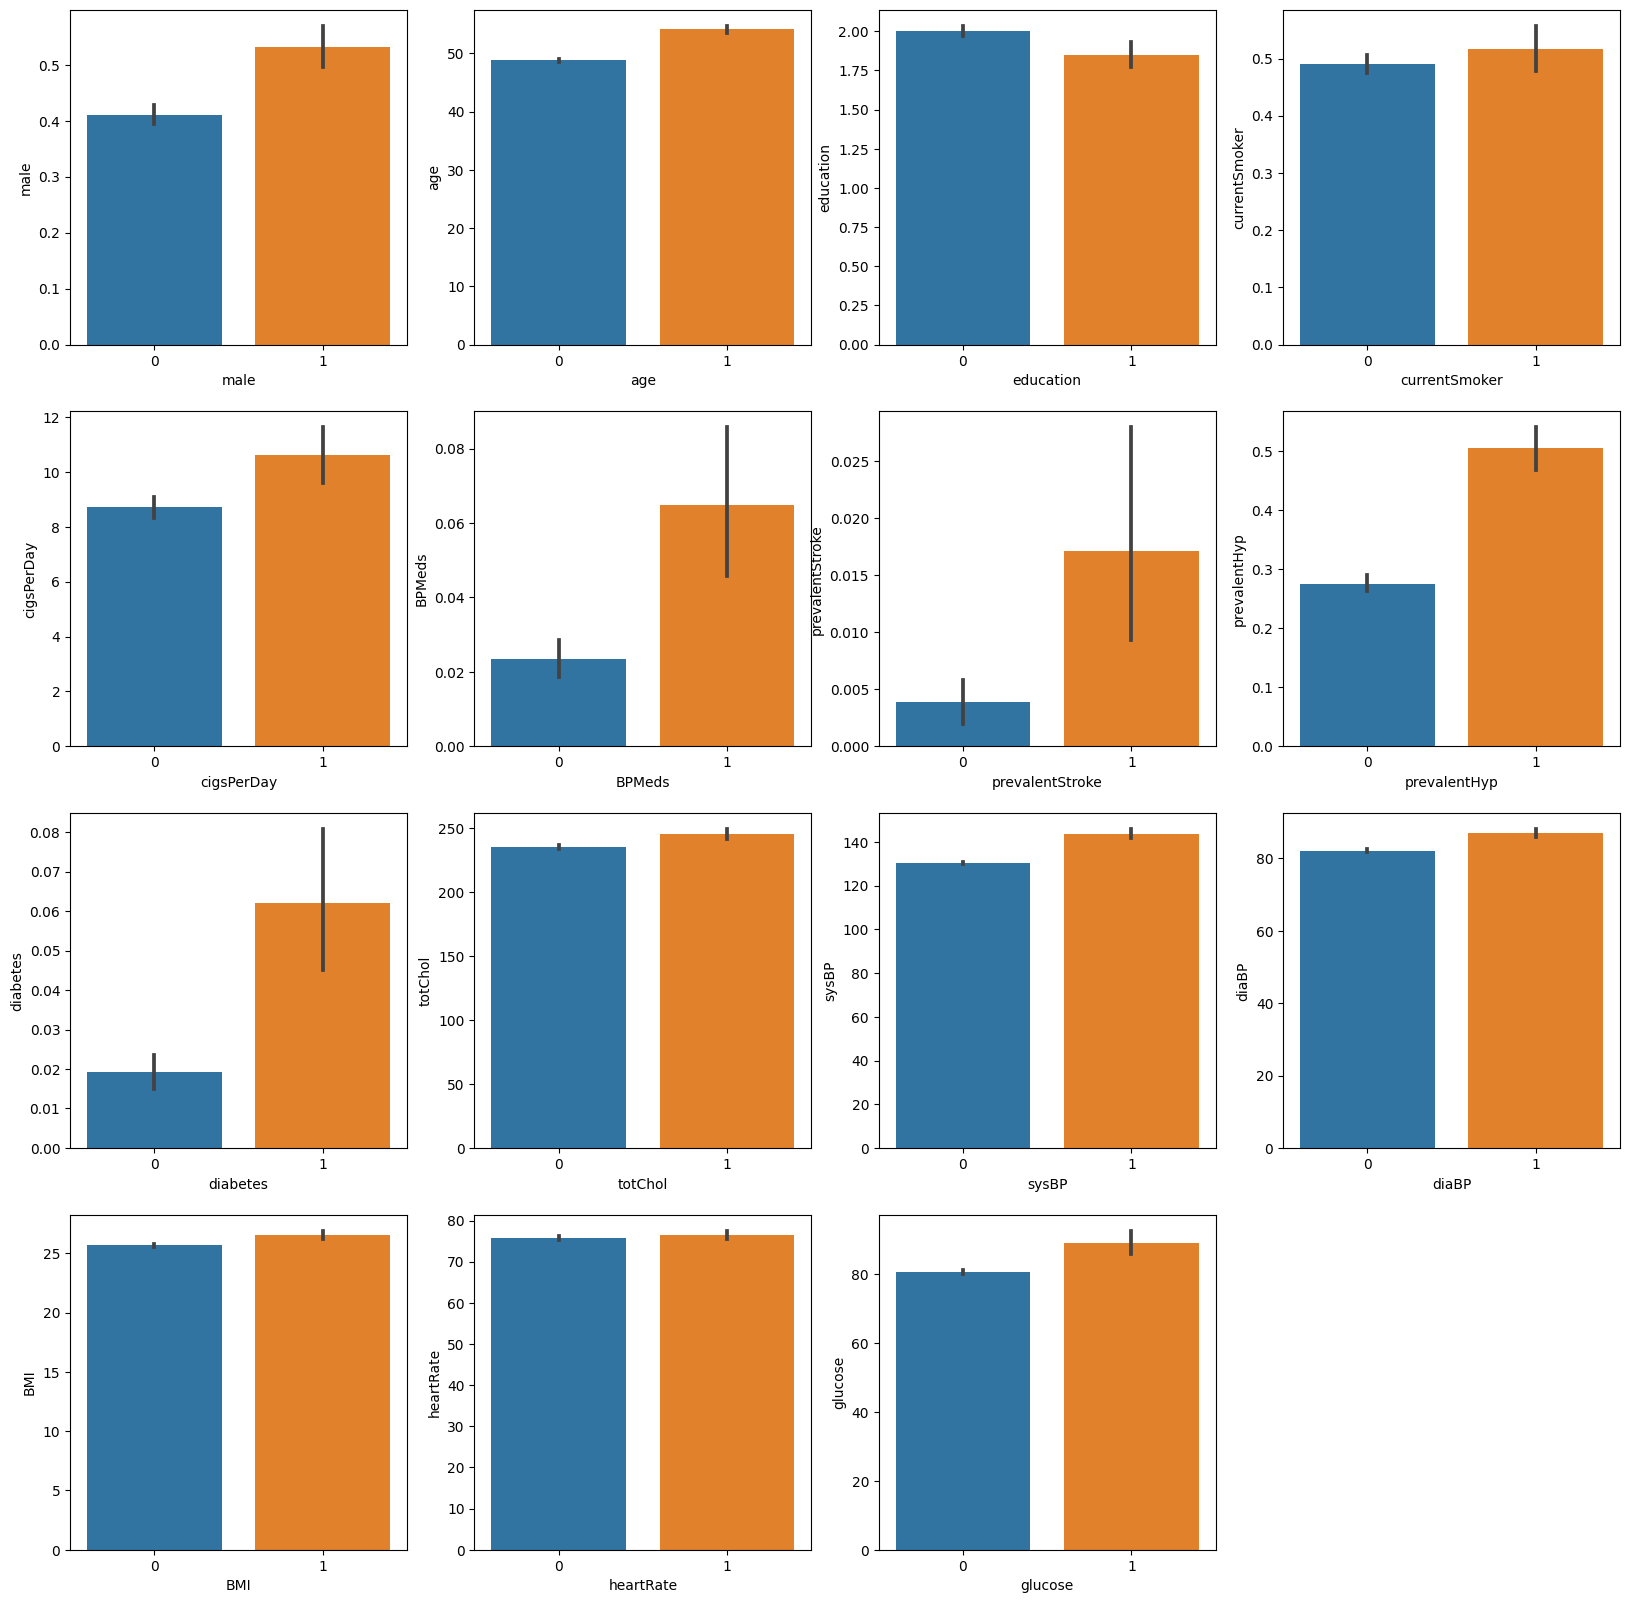

In [12]:
plt.figure(figsize=(20,20))
num=1
for col in data.drop('TenYearCHD',axis=1):
    if num<=16:
        plt.subplot(4,4,num)
        sns.barplot(x=data['TenYearCHD'],y=data[col])
        plt.xlabel(col)
    num+=1    

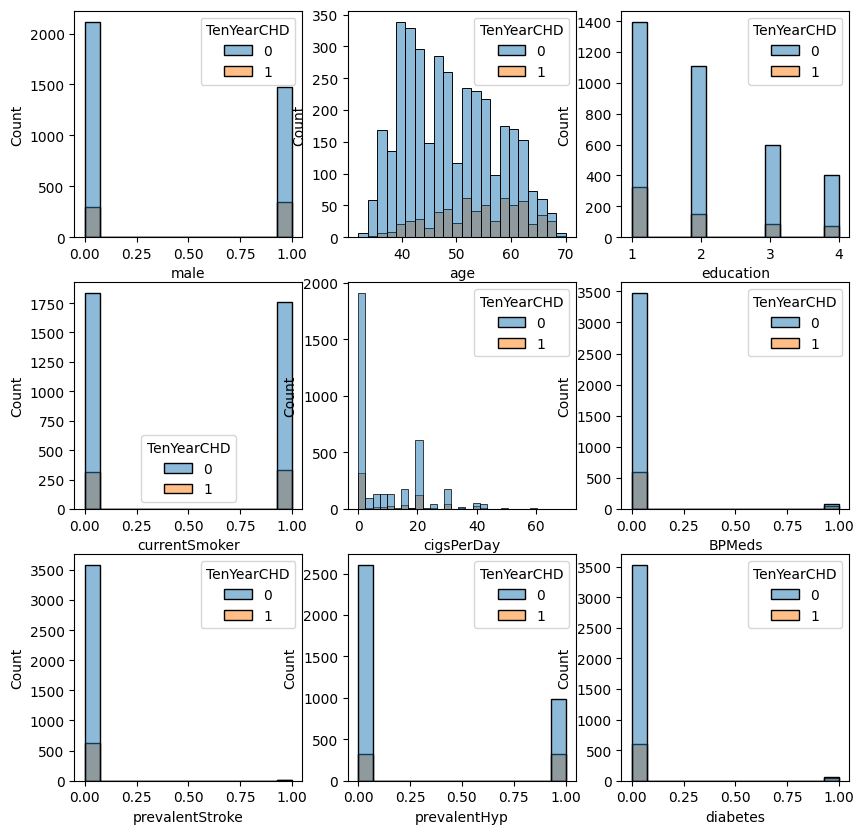

In [13]:
plt.figure(figsize=(10,10))
num=1
for col in data.drop(['TenYearCHD'],axis=1):
    if num<=9:
        plt.subplot(3,3,num)
        sns.histplot(x=data[col],hue=data['TenYearCHD'])
    num+=1

### Multivariate analysis

In [14]:
#sns.pairplot(data=data,hue="TenYearCHD")

# Data Preprocessing

In [15]:
#check null value
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
#handle null values
#education
data['education'].median()

2.0

In [17]:
data.loc[data["education"].isnull()==True,'education']=2.0

In [18]:
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [19]:
#cigsPerDay
data['cigsPerDay'].median()

0.0

In [20]:
data.loc[data["cigsPerDay"].isnull()==True,'cigsPerDay']=0.0

In [21]:
#BPMeds
data['BPMeds'].median()

0.0

In [22]:
data.loc[data["BPMeds"].isnull()==True,'BPMeds']=0.0

In [23]:
#totChol
data['totChol'].median()

234.0

In [24]:
data.loc[data["totChol"].isnull()==True,'totChol']=234.0

In [25]:
#BMI
data['BMI'].median()

25.4

In [26]:
data.loc[data["BMI"].isnull()==True,'BMI']=25.4

In [27]:
#glucose
data['glucose'].median()

78.0

In [28]:
data.loc[data["glucose"].isnull()==True,'glucose']=78.0

In [29]:
#heartRate
data['heartRate'].median()

75.0

In [30]:
data.loc[data["heartRate"].isnull()==True,'heartRate']=75.0

In [31]:
#final check null value present or not
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [32]:
#check dupplicate value
data.duplicated().sum()

0

In [33]:
data.isnull().sum()/len(data)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

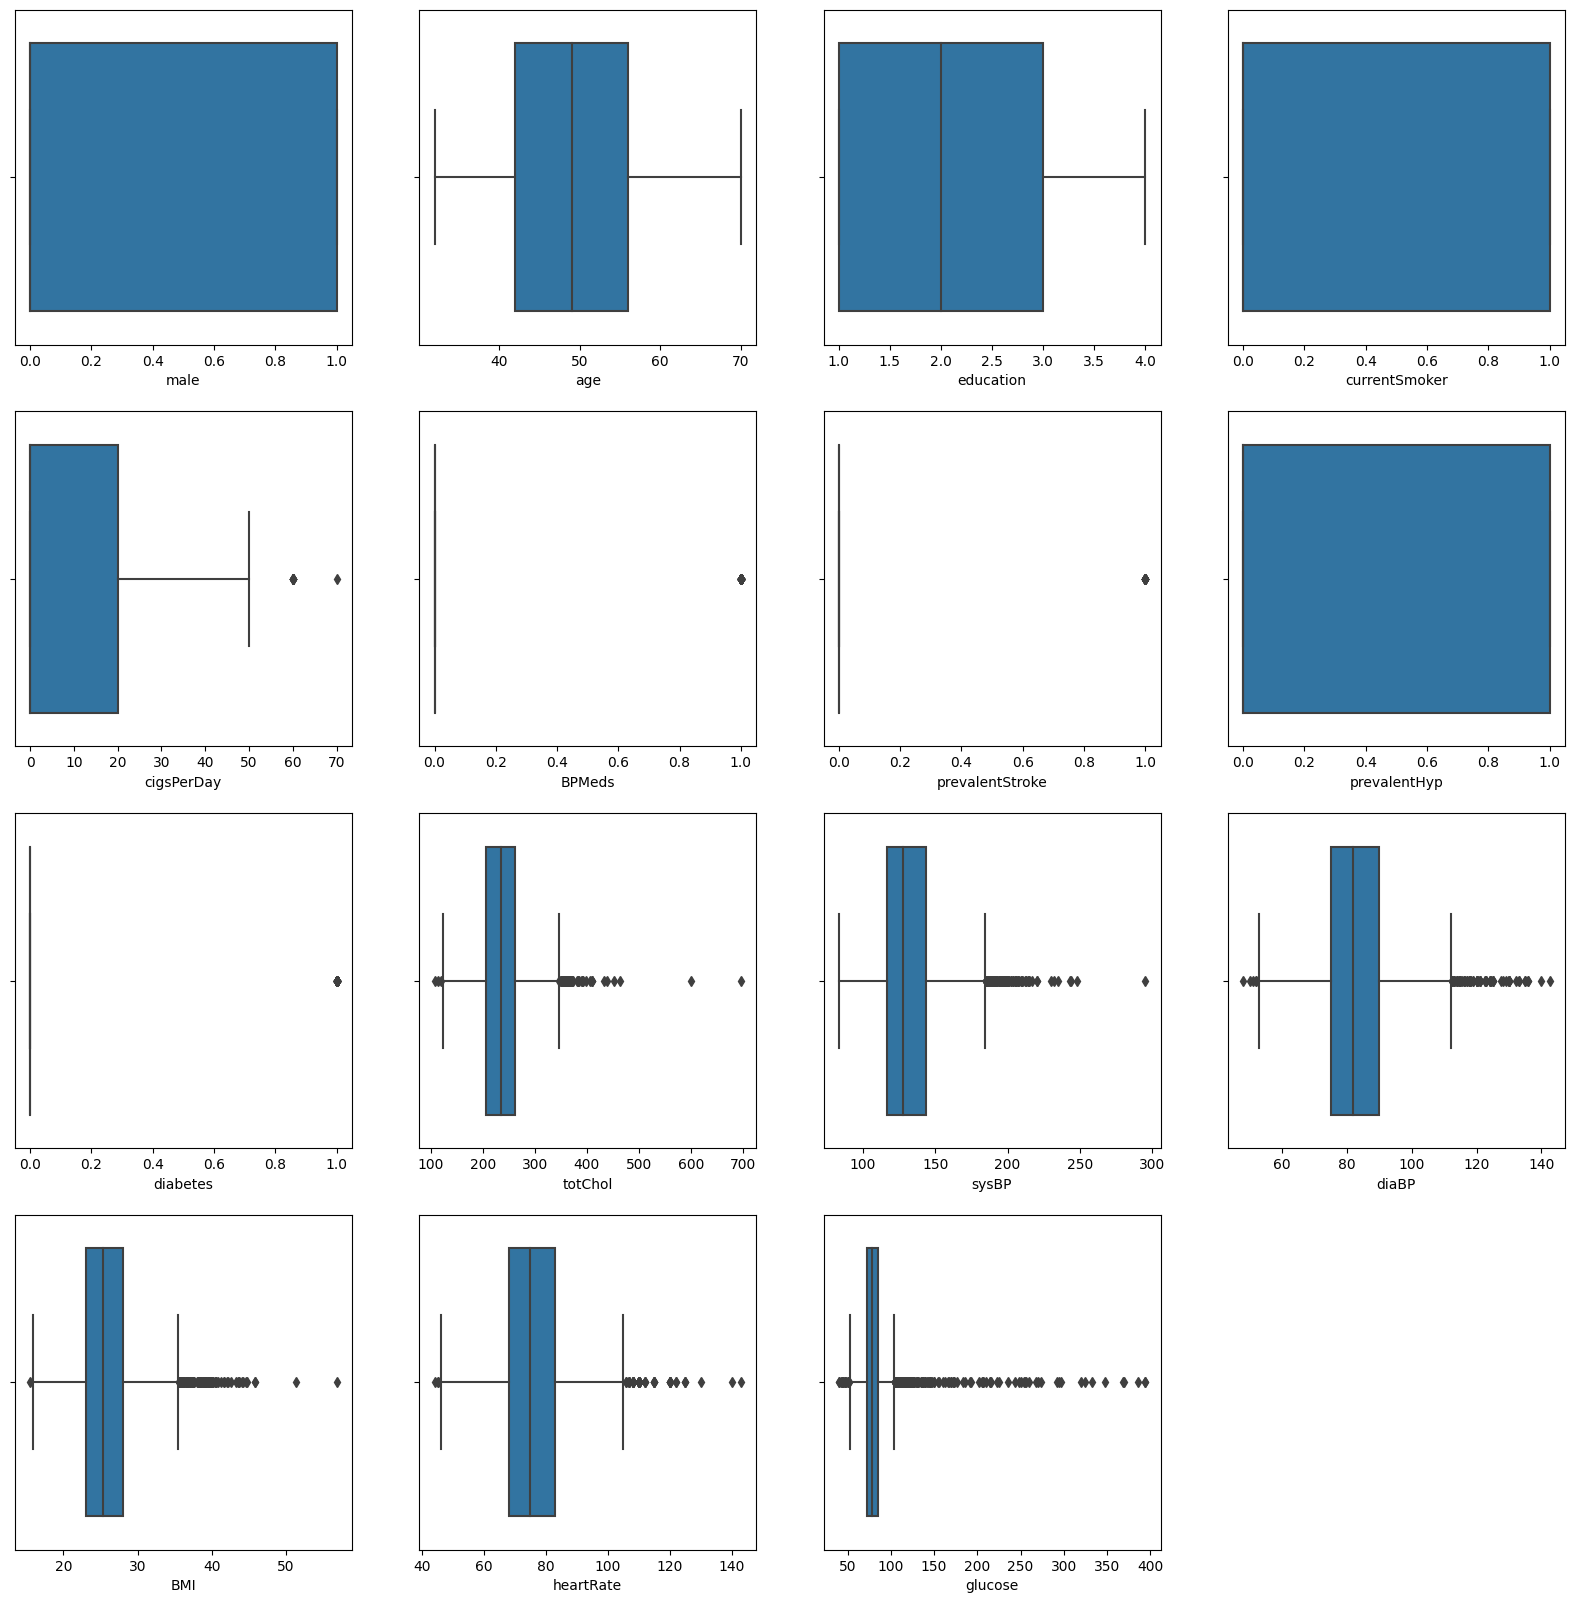

In [34]:
#check outliers
plt.figure(figsize=(20,20))
num=1
for col in data.drop('TenYearCHD',axis=1):
    if num<=16:
        plt.subplot(4,4,num)
        sns.boxplot(x=data[col],hue=data["TenYearCHD"])
        plt.xlabel(col)
    num+=1

In [35]:
#handling outliers
outliers=['cigsPerDay','totChol','BMI','heartRate','glucose','sysBP','diaBP']
for i in outliers :
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    Lower=Q1-1.5*IQR
    Upper=Q3+1.5*IQR
    
    per=len(data.loc[(data[i]<Lower)|(data[i]>Upper)])/len(data)
    print("******Details******\n")
    print("columns:",i)
    print("IQR is:",IQR)
    print("Lower Limit:",Lower)
    print("Upper Limit:",Upper)
    print("percentage of outlier",per)
    print("\n")

******Details******

columns: cigsPerDay
IQR is: 20.0
Lower Limit: -30.0
Upper Limit: 50.0
percentage of outlier 0.002831524303916942


******Details******

columns: totChol
IQR is: 56.0
Lower Limit: 122.0
Upper Limit: 346.0
percentage of outlier 0.013449740443605473


******Details******

columns: BMI
IQR is: 4.957500000000003
Lower Limit: 15.643749999999994
Upper Limit: 35.47375000000001
percentage of outlier 0.022888154789995282


******Details******

columns: heartRate
IQR is: 15.0
Lower Limit: 45.5
Upper Limit: 105.5
percentage of outlier 0.01793298725814063


******Details******

columns: glucose
IQR is: 13.0
Lower Limit: 52.5
Upper Limit: 104.5
percentage of outlier 0.06182161396885323


******Details******

columns: sysBP
IQR is: 27.0
Lower Limit: 76.5
Upper Limit: 184.5
percentage of outlier 0.02973100519112789


******Details******

columns: diaBP
IQR is: 14.875
Lower Limit: 52.6875
Upper Limit: 112.1875
percentage of outlier 0.019112789051439358




In [36]:
#clearing outliers
list=['cigsPerDay','totChol','BMI','heartRate','glucose','sysBP','diaBP']
for i in list:
    data.loc[(data[i]<Lower)| (data[i]>Upper),i]=data[i].median()

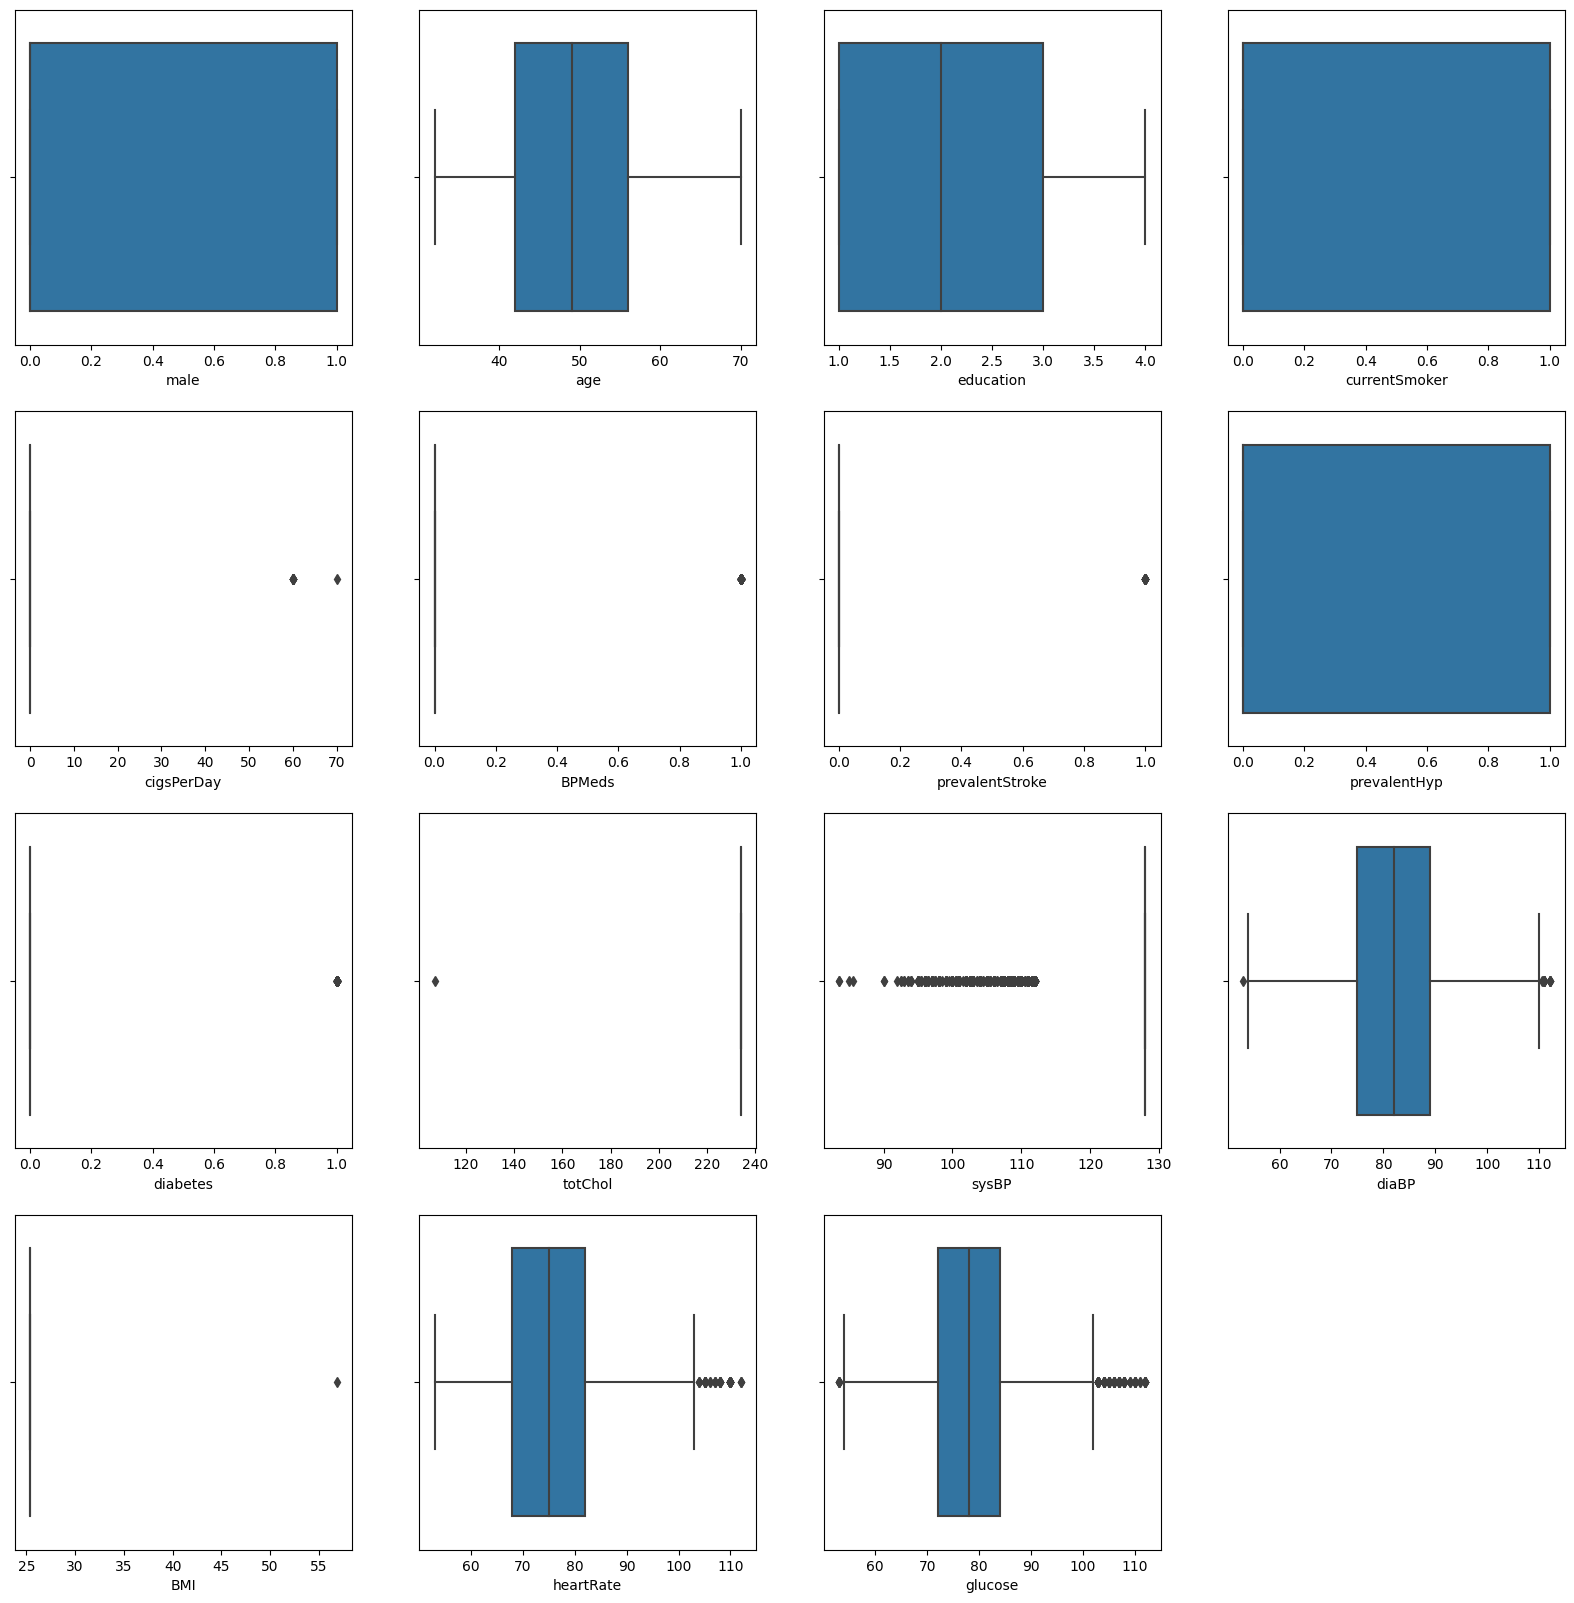

In [37]:
#final check outliers present or not
#check outliers
plt.figure(figsize=(20,20))
num=1
for col in data.drop('TenYearCHD',axis=1):
    if num<=16:
        plt.subplot(4,4,num)
        sns.boxplot(x=data[col],hue=data["TenYearCHD"])
        plt.xlabel(col)
    num+=1

# Feature Engineering

<Axes: >

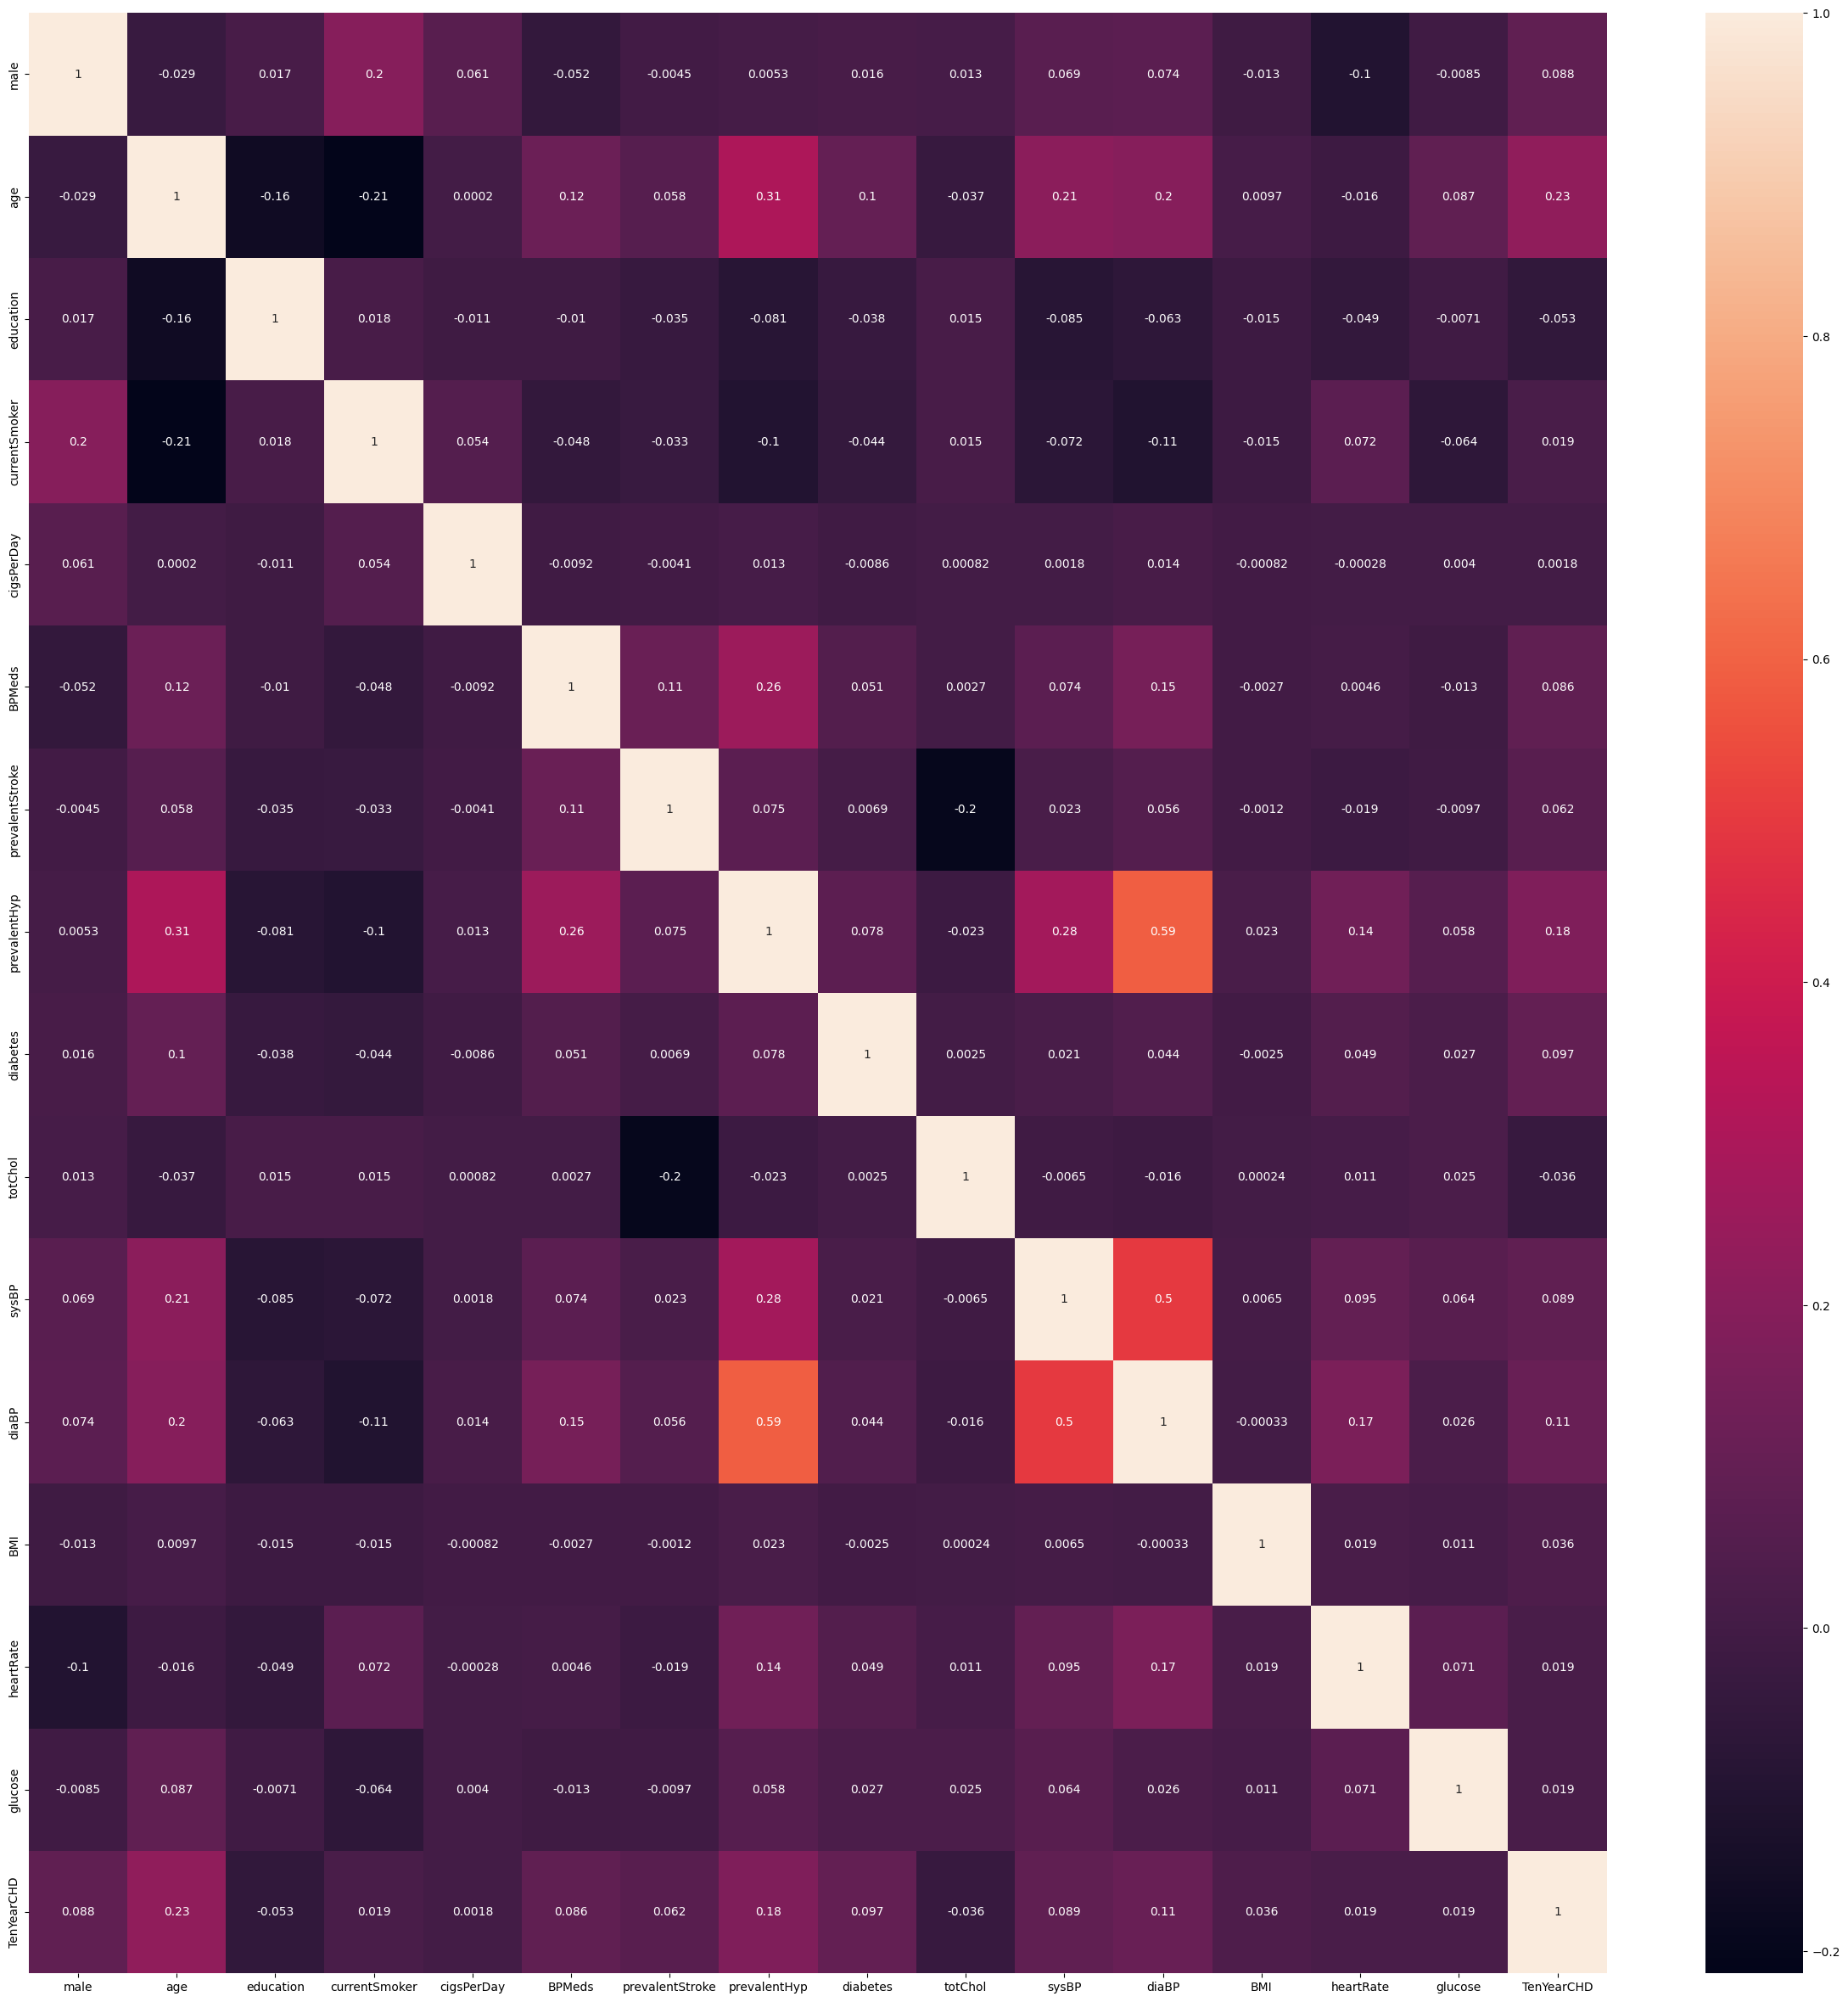

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

# Feature Selection

In [60]:
x=data.iloc[:,0:15]
y=data.iloc[:,15:]


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Model Buliding

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [63]:
#Predition
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Evaluation

In [87]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,pred))

0.839622641509434


In [88]:
print(precision_score(y_test,pred))

1.0


In [89]:
print(recall_score(y_test,pred))

0.014492753623188406


In [90]:
print(f1_score(y_test,pred))

0.02857142857142857


### SVC

In [79]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [93]:
#Predition
svc_pred=classifier.predict(x_test)
svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Evaluation

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,svc_pred))

0.8372641509433962


# Flask Model

In [82]:
import pickle 
file=open("model.pk","wb")
pickle.dump(model,file)